In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from scipy.stats import linregress,pearsonr
import time

In [2]:
#2015 Happiness dataframe
Happy_df_2015 = pd.read_csv("Resources/2015_Clean.csv")

#2016 Happiness dataframe
Happy_df_2016 = pd.read_csv("Resources/2016_Clean.csv")

#2017 Happiness dataframe
Happy_df_2017 = pd.read_csv("Resources/2017_Clean.csv")

#2018 Happiness dataframe
Happy_df_2018 = pd.read_csv("Resources/2018_Clean.csv")

#2019 Happiness dataframe
Happy_df_2019 = pd.read_csv("Resources/2019_Clean.csv")

#2020 Happiness dataframe
Happy_df_2020 = pd.read_csv("Resources/2020_Clean.csv")

#Merging all data sets together
Merge1516_df = pd.merge(Happy_df_2015,Happy_df_2016, on ="country")
Merge1718_df = pd.merge(Happy_df_2017,Happy_df_2018, on ="country")
Merge1920_df = pd.merge(Happy_df_2019,Happy_df_2020, on ="country")
Merge1518_df = pd.merge(Merge1516_df,Merge1718_df, on ="country")
Merge_df = pd.merge(Merge1518_df,Merge1920_df, on ="country")

Merge_df.head()

,country,happiness_score_2015,GDP_per_capita_2015,social_support_2015,life_expectancy_2015,freedom_2015,corruption_2015,generosity_2015,happiness_score_2016,GDP_per_capita_2016,...,freedom_2019,generosity_2019,corruption_2019,happiness_score_2020,GDP_per_capita_2020,social_support_2020,life_expectancy_2020,freedom_2020,generosity_2020,corruption_2020
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.509,1.52733,...,0.572,0.263,0.343,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.501,1.42666,...,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.526,1.44178,...,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.498,1.57744,...,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,...,0.584,0.285,0.308,7.2321,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702


The correlation between both factors is 0.44


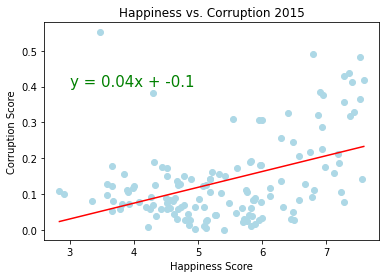

The correlation between both factors is 0.43


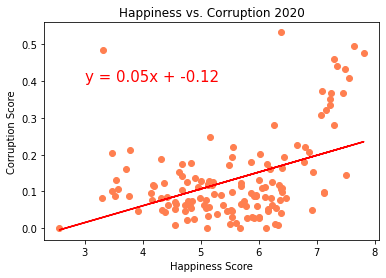

In [51]:
# Happy_2020 = Merge_df["happiness_score_2020"]
x_axis = Merge_df["happiness_score_2015"]
y_axis = Merge_df["corruption_2015"]
plt.scatter(x_axis, y_axis, c='lightblue')
plt.xlabel("Happiness Score")
plt.ylabel("Corruption Score")
plt.title("Happiness vs. Corruption 2015")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(3,0.4),fontsize=15,color="green")
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

x_axis = Merge_df["happiness_score_2020"]
y_axis = Merge_df["corruption_2020"]
plt.scatter(x_axis, y_axis, c='coral')
plt.xlabel("Happiness Score")
plt.ylabel("Corruption Score")
plt.title("Happiness vs. Corruption 2020")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(3,0.4),fontsize=15,color="red")
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

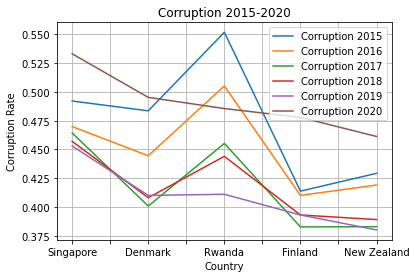

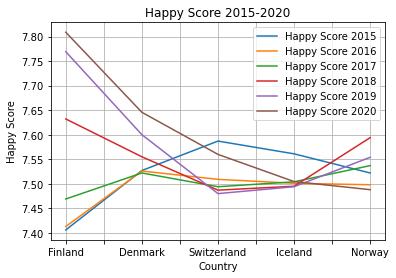

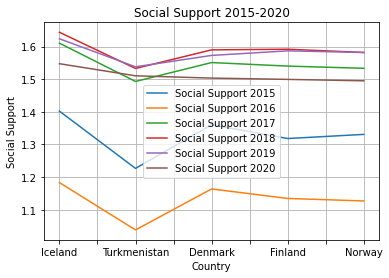

In [3]:
copy_merge_df = Merge_df.copy()

data_df = copy_merge_df.rename(columns={'country': 'Country', 'corruption_2015': 'Corruption 2015', 'corruption_2016': 'Corruption 2016', 'corruption_2017': 'Corruption 2017',  
                                        'corruption_2018': 'Corruption 2018', 'corruption_2019': 'Corruption 2019', 'corruption_2020': 'Corruption 2020',
                                        'happiness_score_2015': 'Happy Score 2015','happiness_score_2016': 'Happy Score 2016','happiness.score_2017': 'Happy Score 2017',
                                        'happiness_score_2018': 'Happy Score 2018', 'happiness_score_2019': 'Happy Score 2019','happiness_score_2020': 'Happy Score 2020',
                                       'social_support_2015': 'Social Support 2015', 'social_support_2016': 'Social Support 2016', 'social_support_2017': 'Social Support 2017',
                                       'social_support_2018': 'Social Support 2018', 'social_support_2019': 'Social Support 2019', 'social_support_2020': 'Social Support 2020'})


plot_data_df = data_df.nlargest(5, ['Corruption 2020'])

plot_data_df.plot('Country',['Corruption 2015','Corruption 2016','Corruption 2017',
                        'Corruption 2018', 'Corruption 2019', 'Corruption 2020'],kind = 'line')
plt.title("Corruption 2015-2020")
plt.xlabel("Country")
plt.ylabel("Corruption Rate")
plt.grid()
plt.show()

plot_data_df = data_df.nlargest(5, ['Happy Score 2020'])

plot_data_df.plot('Country',['Happy Score 2015','Happy Score 2016','Happy Score 2017',
                        'Happy Score 2018', 'Happy Score 2019', 'Happy Score 2020'],kind = 'line')
plt.title("Happy Score 2015-2020")
plt.xlabel("Country")
plt.ylabel("Happy Score")
plt.grid()
plt.show()

plot_data_df = data_df.nlargest(5, ['Social Support 2020'])

plot_data_df.plot('Country',['Social Support 2015','Social Support 2016','Social Support 2017',
                        'Social Support 2018', 'Social Support 2019', 'Social Support 2020'],kind = 'line')
plt.title("Social Support 2015-2020")
plt.xlabel("Country")
plt.ylabel("Social Support")
plt.grid()
plt.show()

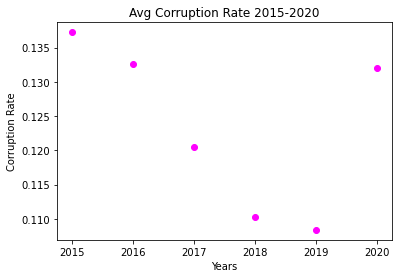

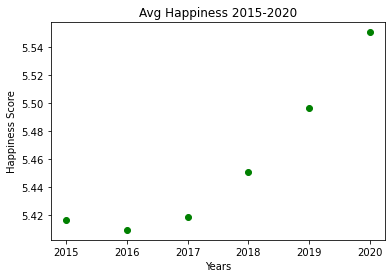

In [4]:
Corrupt_2015 = Merge_df["corruption_2015"].mean()
Corrupt_2016 = Merge_df["corruption_2016"].mean()
Corrupt_2017 = Merge_df["corruption_2017"].mean()
Corrupt_2018 = Merge_df["corruption_2018"].mean()
Corrupt_2019 = Merge_df["corruption_2019"].mean()
Corrupt_2020 = Merge_df["corruption_2020"].mean()

y = [Corrupt_2015, Corrupt_2016, Corrupt_2017, Corrupt_2018, Corrupt_2019, Corrupt_2020]
x = ['2015', '2016', '2017', '2018', '2019', '2020']
plt.scatter(x, y, c='magenta')
plt.title("Avg Corruption Rate 2015-2020")
plt.ylabel("Corruption Rate")
plt.xlabel("Years")
plt.show()

Happy_2015 = Merge_df["happiness_score_2015"].mean()
Happy_2016 = Merge_df["happiness_score_2016"].mean()
Happy_2017 = Merge_df["happiness.score_2017"].mean()
Happy_2018 = Merge_df["happiness_score_2018"].mean()
Happy_2019 = Merge_df["happiness_score_2019"].mean()
Happy_2020 = Merge_df["happiness_score_2020"].mean()

y = [Happy_2015, Happy_2016, Happy_2017, Happy_2018, Happy_2019, Happy_2020]
x = ['2015', '2016', '2017', '2018', '2019', '2020']
plt.scatter(x, y, c='green')
plt.title("Avg Happiness 2015-2020")
plt.ylabel("Happiness Score")
plt.xlabel("Years")
plt.show()